<a href="https://colab.research.google.com/github/CoderButNoob/Stock-Price-Predict/blob/main/stock.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as data
import yfinance as yf



In [6]:
# Get the data 
stock = input("Enter name of stock\n")
sp500 = yf.Ticker(stock)

# Retrieve the historical prices
sp500 = sp500.history(period="max")

# Print the data
print(sp500)

Enter name of stock
TSLA
                                 Open        High         Low       Close  \
Date                                                                        
2010-06-29 00:00:00-04:00    1.266667    1.666667    1.169333    1.592667   
2010-06-30 00:00:00-04:00    1.719333    2.028000    1.553333    1.588667   
2010-07-01 00:00:00-04:00    1.666667    1.728000    1.351333    1.464000   
2010-07-02 00:00:00-04:00    1.533333    1.540000    1.247333    1.280000   
2010-07-06 00:00:00-04:00    1.333333    1.333333    1.055333    1.074000   
...                               ...         ...         ...         ...   
2023-04-14 00:00:00-04:00  183.949997  186.279999  182.009995  185.000000   
2023-04-17 00:00:00-04:00  186.320007  189.690002  182.690002  187.039993   
2023-04-18 00:00:00-04:00  187.149994  187.690002  183.580002  184.309998   
2023-04-19 00:00:00-04:00  179.100006  183.500000  177.649994  180.589996   
2023-04-20 00:00:00-04:00  166.164993  169.550003  

In [7]:
sp500.index

DatetimeIndex(['2010-06-29 00:00:00-04:00', '2010-06-30 00:00:00-04:00',
               '2010-07-01 00:00:00-04:00', '2010-07-02 00:00:00-04:00',
               '2010-07-06 00:00:00-04:00', '2010-07-07 00:00:00-04:00',
               '2010-07-08 00:00:00-04:00', '2010-07-09 00:00:00-04:00',
               '2010-07-12 00:00:00-04:00', '2010-07-13 00:00:00-04:00',
               ...
               '2023-04-06 00:00:00-04:00', '2023-04-10 00:00:00-04:00',
               '2023-04-11 00:00:00-04:00', '2023-04-12 00:00:00-04:00',
               '2023-04-13 00:00:00-04:00', '2023-04-14 00:00:00-04:00',
               '2023-04-17 00:00:00-04:00', '2023-04-18 00:00:00-04:00',
               '2023-04-19 00:00:00-04:00', '2023-04-20 00:00:00-04:00'],
              dtype='datetime64[ns, America/New_York]', name='Date', length=3225, freq=None)

<Axes: xlabel='Date'>

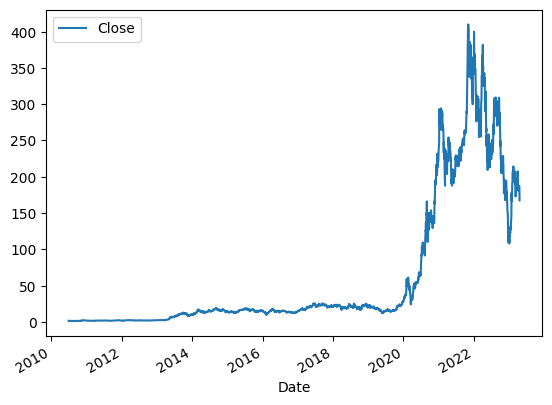

In [8]:
sp500.plot.line(y="Close" , use_index=True)

In [9]:
del sp500["Dividends"]
del sp500["Stock Splits"]

In [10]:
sp500["Tomorrow"]= sp500["Close"].shift(-1)

In [11]:
sp500

,Open,High,Low,Close,Volume,Tomorrow
Date,,,,,,
2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,1.588667
2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,1.464000
2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,1.280000
2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,1.074000
2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,1.053333
...,...,...,...,...,...,...
2023-04-14 00:00:00-04:00,183.949997,186.279999,182.009995,185.000000,96306500,187.039993
2023-04-17 00:00:00-04:00,186.320007,189.690002,182.690002,187.039993,116662200,184.309998
2023-04-18 00:00:00-04:00,187.149994,187.690002,183.580002,184.309998,92067000,180.589996


In [12]:
sp500["Target"]=(sp500["Tomorrow"]> sp500["Close"]).astype(int)

In [14]:
sp500

,Open,High,Low,Close,Volume,Tomorrow,Target
Date,,,,,,,
2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,1.588667,0
2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,1.464000,0
2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,1.280000,0
2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,1.074000,0
2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,1.053333,0
...,...,...,...,...,...,...,...
2023-04-14 00:00:00-04:00,183.949997,186.279999,182.009995,185.000000,96306500,187.039993,1
2023-04-17 00:00:00-04:00,186.320007,189.690002,182.690002,187.039993,116662200,184.309998,0
2023-04-18 00:00:00-04:00,187.149994,187.690002,183.580002,184.309998,92067000,180.589996,0


In [15]:
sp500 = sp500.loc["1990-01-01":].copy()

In [16]:
sp500

,Open,High,Low,Close,Volume,Tomorrow,Target
Date,,,,,,,
2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,1.588667,0
2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,1.464000,0
2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,1.280000,0
2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,1.074000,0
2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,1.053333,0
...,...,...,...,...,...,...,...
2023-04-14 00:00:00-04:00,183.949997,186.279999,182.009995,185.000000,96306500,187.039993,1
2023-04-17 00:00:00-04:00,186.320007,189.690002,182.690002,187.039993,116662200,184.309998,0
2023-04-18 00:00:00-04:00,187.149994,187.690002,183.580002,184.309998,92067000,180.589996,0


In [17]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100 , min_samples_split=100 , random_state=1)

train = sp500.iloc[:-100]
test = sp500.iloc[:-100]

predictors = ["Close", "Volume", "Open" , "High" , "Low" ]
model.fit(train[predictors], train["Target"])


RandomForestClassifier(min_samples_split=100, random_state=1)

In [18]:
from sklearn.metrics import precision_score

preds = model.predict(test[predictors])

In [19]:
import pandas as pd
preds = pd.Series(preds , index=test.index)

In [20]:
preds

Date
2010-06-29 00:00:00-04:00    0
2010-06-30 00:00:00-04:00    0
2010-07-01 00:00:00-04:00    0
2010-07-02 00:00:00-04:00    0
2010-07-06 00:00:00-04:00    0
                            ..
2022-11-17 00:00:00-05:00    0
2022-11-18 00:00:00-05:00    1
2022-11-21 00:00:00-05:00    1
2022-11-22 00:00:00-05:00    1
2022-11-23 00:00:00-05:00    0
Length: 3125, dtype: int64

In [21]:
combined = pd.concat([test["Target"], preds],axis=1)

<Axes: xlabel='Date'>

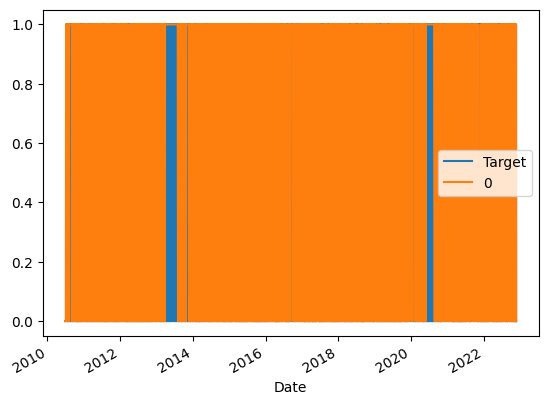

In [22]:
combined.plot()

In [23]:
def predict(train , test , predictors , model):
  model.fit(train[predictors],train["Target"])
  preds = model.predict(test[predictors])
  preds = pd.Series(preds, index=test.index , name="Predictions")
  combined = pd.concat([test["Target"],preds], axis=1)
  return combined

In [24]:
def backtest(data , model , predictors , start=2500, step=250):
  all_predictions =[]

  for i in range(start , data.shape[0] , step):
     train = data.iloc[0:i].copy()
     test = data.iloc[i:(i+step)].copy()
     predictions = predict(train, test , predictors , model)
     all_predictions.append(predictions)
  return pd.concat(all_predictions)
     


In [25]:
predictions = backtest(sp500, model , predictors)

In [26]:
predictions["Predictions"].value_counts()

0    515
1    210
Name: Predictions, dtype: int64

In [27]:
precision_score(predictions["Target"],predictions["Predictions"])

0.5047619047619047

In [28]:
predictions["Target"].value_counts()/predictions.shape[0]

1    0.532414
0    0.467586
Name: Target, dtype: float64

In [29]:
horizons = [2,5,60,250,1000]
new_predictors = []

for horizon in horizons:
  rolling_averages = sp500.rolling(horizon).mean()

  ratio_column = f"Close_Ratio_{horizon}"
  sp500[ratio_column] = sp500["Close"] / rolling_averages["Close"]

  trend_column = f"Trend_{horizon}"
  sp500[trend_column] = sp500.shift(1).rolling(horizon).sum()["Target"]

  new_predictors += [ratio_column, trend_column]


In [30]:
sp500

,Open,High,Low,Close,Volume,Tomorrow,Target,Close_Ratio_2,Trend_2,Close_Ratio_5,Trend_5,Close_Ratio_60,Trend_60,Close_Ratio_250,Trend_250,Close_Ratio_1000,Trend_1000
Date,,,,,,,,,,,,,,,,,
2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,1.588667,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,1.464000,0,0.998743,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,1.280000,0,0.959161,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,1.074000,0,0.932945,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,1.053333,0,0.912489,0.0,0.767216,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-04-14 00:00:00-04:00,183.949997,186.279999,182.009995,185.000000,96306500,187.039993,1,0.997573,1.0,1.002449,2.0,0.992566,34.0,0.829621,126.0,1.078379,536.0
2023-04-17 00:00:00-04:00,186.320007,189.690002,182.690002,187.039993,116662200,184.309998,0,1.005483,1.0,1.010732,3.0,0.998168,35.0,0.840997,126.0,1.089182,537.0
2023-04-18 00:00:00-04:00,187.149994,187.690002,183.580002,184.309998,92067000,180.589996,0,0.992648,1.0,0.998656,2.0,0.979167,34.0,0.831090,125.0,1.072234,536.0


In [31]:
sp500 =sp500.dropna()

In [32]:
sp500

,Open,High,Low,Close,Volume,Tomorrow,Target,Close_Ratio_2,Trend_2,Close_Ratio_5,Trend_5,Close_Ratio_60,Trend_60,Close_Ratio_250,Trend_250,Close_Ratio_1000,Trend_1000
Date,,,,,,,,,,,,,,,,,
2014-06-19 00:00:00-04:00,15.258667,15.687333,15.133333,15.186000,131896500,15.306000,1,1.001473,1.0,1.019094,4.0,1.104864,30.0,1.305755,134.0,3.367118,516.0
2014-06-20 00:00:00-04:00,15.234667,15.419333,15.080000,15.306000,73558500,15.814667,1,1.003935,2.0,1.006285,4.0,1.112100,31.0,1.312219,134.0,3.383434,517.0
2014-06-23 00:00:00-04:00,15.300667,15.932667,15.214667,15.814667,116866500,15.500000,0,1.016345,2.0,1.028360,4.0,1.146291,32.0,1.351662,134.0,3.484822,518.0
2014-06-24 00:00:00-04:00,15.931333,16.125334,15.442000,15.500000,121138500,15.792667,1,0.989951,1.0,1.007174,3.0,1.121665,31.0,1.320951,133.0,3.404815,518.0
2014-06-25 00:00:00-04:00,15.536667,15.836667,15.349333,15.792667,87024000,15.706667,0,1.009353,1.0,1.017578,4.0,1.140236,32.0,1.342000,133.0,3.457924,519.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-04-13 00:00:00-04:00,182.960007,186.500000,180.940002,185.899994,112933000,185.000000,0,1.014627,1.0,1.007261,2.0,1.002435,34.0,0.831519,126.0,1.084690,536.0
2023-04-14 00:00:00-04:00,183.949997,186.279999,182.009995,185.000000,96306500,187.039993,1,0.997573,1.0,1.002449,2.0,0.992566,34.0,0.829621,126.0,1.078379,536.0
2023-04-17 00:00:00-04:00,186.320007,189.690002,182.690002,187.039993,116662200,184.309998,0,1.005483,1.0,1.010732,3.0,0.998168,35.0,0.840997,126.0,1.089182,537.0


In [34]:
stock2 = input("Enter name of stock you want to compare with\n")
sp500_2 = yf.Ticker(stock2)

# Retrieve the historical prices
sp500_2 = sp500_2.history(period="max")

# Print the data
print(sp500_2)

Enter name of stock you want to compare with
AAPL
                                 Open        High         Low       Close  \
Date                                                                        
1980-12-12 00:00:00-05:00    0.099722    0.100155    0.099722    0.099722   
1980-12-15 00:00:00-05:00    0.094953    0.094953    0.094519    0.094519   
1980-12-16 00:00:00-05:00    0.088015    0.088015    0.087582    0.087582   
1980-12-17 00:00:00-05:00    0.089749    0.090183    0.089749    0.089749   
1980-12-18 00:00:00-05:00    0.092351    0.092785    0.092351    0.092351   
...                               ...         ...         ...         ...   
2023-04-14 00:00:00-04:00  164.589996  166.320007  163.820007  165.210007   
2023-04-17 00:00:00-04:00  165.089996  165.389999  164.029999  165.229996   
2023-04-18 00:00:00-04:00  166.100006  167.410004  165.649994  166.470001   
2023-04-19 00:00:00-04:00  165.800003  168.160004  165.539993  167.630005   
2023-04-20 00:00:00-04:00 

In [35]:
sp500_2.index

DatetimeIndex(['1980-12-12 00:00:00-05:00', '1980-12-15 00:00:00-05:00',
               '1980-12-16 00:00:00-05:00', '1980-12-17 00:00:00-05:00',
               '1980-12-18 00:00:00-05:00', '1980-12-19 00:00:00-05:00',
               '1980-12-22 00:00:00-05:00', '1980-12-23 00:00:00-05:00',
               '1980-12-24 00:00:00-05:00', '1980-12-26 00:00:00-05:00',
               ...
               '2023-04-06 00:00:00-04:00', '2023-04-10 00:00:00-04:00',
               '2023-04-11 00:00:00-04:00', '2023-04-12 00:00:00-04:00',
               '2023-04-13 00:00:00-04:00', '2023-04-14 00:00:00-04:00',
               '2023-04-17 00:00:00-04:00', '2023-04-18 00:00:00-04:00',
               '2023-04-19 00:00:00-04:00', '2023-04-20 00:00:00-04:00'],
              dtype='datetime64[ns, America/New_York]', name='Date', length=10678, freq=None)

<Axes: xlabel='Date'>

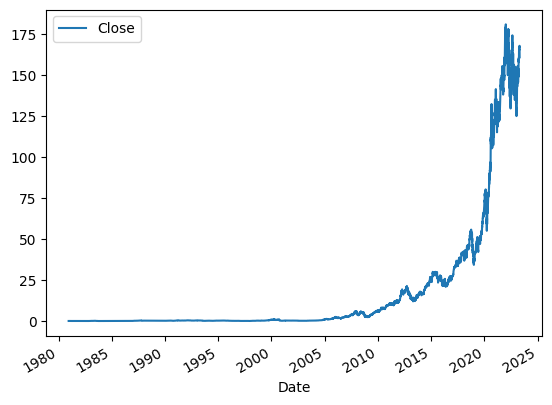

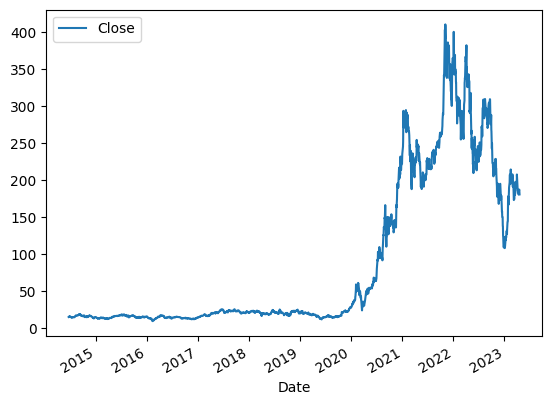

In [36]:
sp500_2.plot.line(y="Close" , use_index=True)
sp500.plot.line(y="Close" , use_index=True)